In [ ]:
# Ce code est le travail de l'étudiant Mohamed Ali HOUAS

In [17]:
# Question 2/ (a)

import networkx as nx
import numpy as np
import matplotlib.pylab as plt

def degree_distribution(graph, title) : # Fonction pour calculer et afficher la distribution des degrés d'un graphe
    fig, axe = plt.subplots(1, 1, figsize=(12/2,9/2))
    degree = [v for k,v in dict(graph.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    axe.set_title(title)
    axe.loglog(k, PDF, 'ro')
    axe.set_xlabel("$k$ Degree")
    axe.set_ylabel("$P_k$")

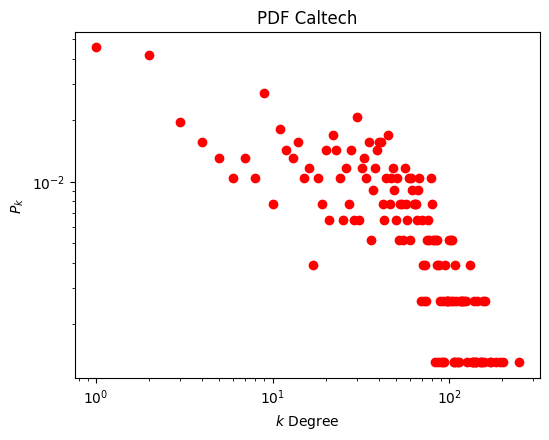

In [19]:
# Lire le graphe Caltech
graphCaltech = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")

degree_distribution(graphCaltech, "PDF Caltech")

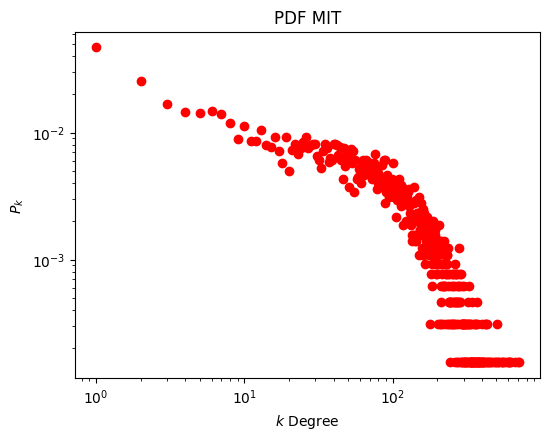

In [20]:
# Lire le graphe MIT
graphMIT = nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")

degree_distribution(graphMIT, "PDF MIT")

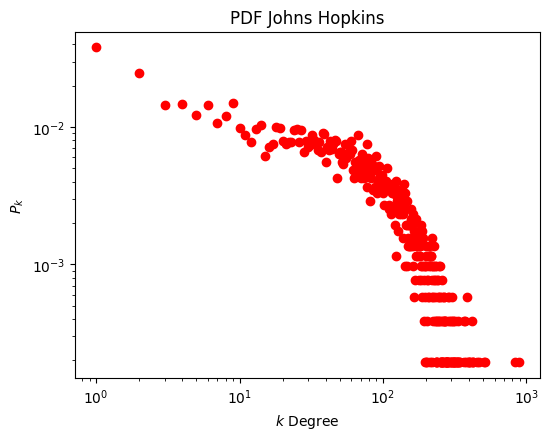

In [21]:
# Lire le graphe Johns Hopkins
graphJH = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")

degree_distribution(graphJH, "PDF Johns Hopkins")

In [1]:
# Question 2/ (b)

import networkx as nx

# Fonction pour calculer et afficher le coefficient de clustering global (transitivity), le coefficient de clustering local moyen
# et la densité relatifs à un graphe
def clustering_density_compute (graph) : 
    print("global clustering coefficient = ",nx.transitivity(graph))
    print("mean local clustering coefficient = ",nx.average_clustering(graph, count_zeros=True))
    nb_nodes = graph.number_of_nodes()
    nb_edges = graph.number_of_edges()
    graph_density = nb_edges/(nb_nodes*(nb_nodes-1))
    print("graph density = ",nx.density(graph))

graphCaltech = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")
graphMIT = nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")
graphJH = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")

print ("         Caltech : ")
clustering_density_compute(graphCaltech)
print("\n")
print ("         MIT : ")
clustering_density_compute(graphMIT)
print("\n")
print ("         Johns Hopkins : ")
clustering_density_compute(graphJH)

         Caltech : 
global clustering coefficient =  0.2912826901150874
mean local clustering coefficient =  0.40929439048517247
graph density =  0.05640442132639792


         MIT : 
global clustering coefficient =  0.18028845093502427
mean local clustering coefficient =  0.2712187419501315
graph density =  0.012118119495041378


         Johns Hopkins : 
global clustering coefficient =  0.19316123901594015
mean local clustering coefficient =  0.26839307371293525
graph density =  0.013910200162372396


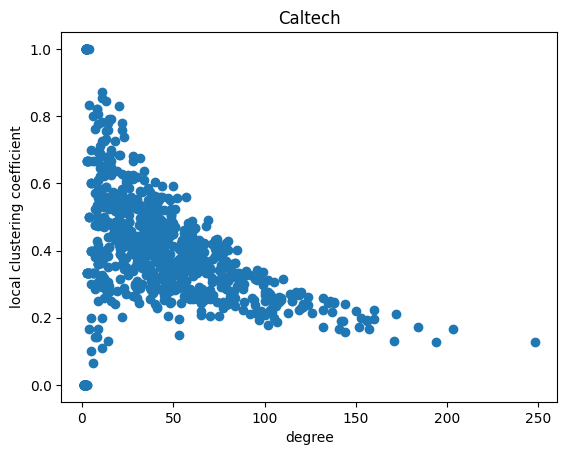

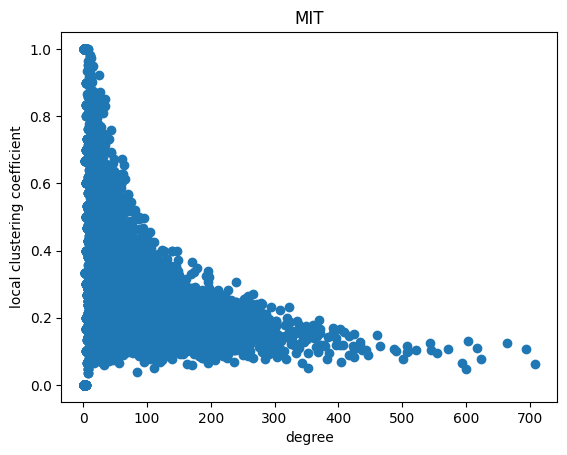

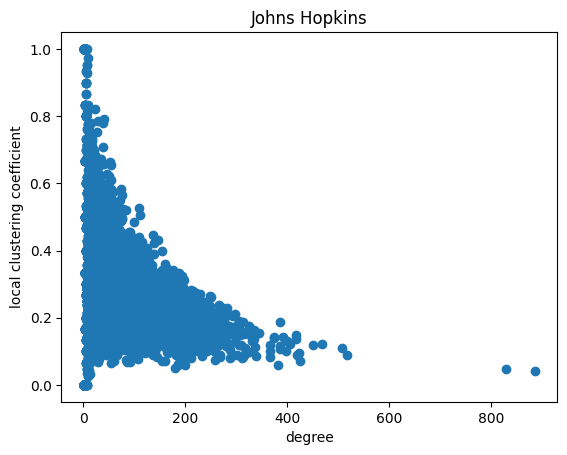

In [16]:
# Question 2/ (c)

import networkx as nx
import numpy as np
import matplotlib.pylab as plt

# Fonction pour tracer un nuage de points coefficient_de_clustering_local en fonction du degree des noeuds
def scatter_degree_clustering(graph, title) :
    degree = [v for k,v in dict(graph.degree()).items()]
    local_clustering = [v for k,v in nx.clustering(graph).items()]
    plt.scatter(degree,local_clustering)
    plt.title(title)
    plt.xlabel("degree")
    plt.ylabel("local clustering coefficient")
    plt.show()

graphCaltech = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")
graphMIT = nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")
graphJH = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")

scatter_degree_clustering(graphCaltech,"Caltech")
scatter_degree_clustering(graphMIT,"MIT")
scatter_degree_clustering(graphJH,"Johns Hopkins")

In [2]:
# Question 3/ (a)

import networkx as nx
from os import listdir

network_size = []
student_fac_assortativity = []
major_assortativity = []
vertex_degree_assortativity = []
dorm_assortativity = []
gender_assortativity = []
gml_files_directory = "/home/debian/Téléchargements/fb100/data/"

for file in listdir(gml_files_directory) :
    graph_to_read = gml_files_directory + file
    graph = nx.read_gml(graph_to_read)
    network_size.append(graph.number_of_nodes())
    student_fac_assortativity.append(nx.attribute_assortativity_coefficient(graph,"student_fac"))
    major_assortativity.append(nx.attribute_assortativity_coefficient(graph,"major_index"))
    vertex_degree_assortativity.append(nx.degree_assortativity_coefficient(graph))
    dorm_assortativity.append(nx.attribute_assortativity_coefficient(graph,"dorm"))
    gender_assortativity.append(nx.attribute_assortativity_coefficient(graph,"gender"))

In [47]:
import pandas as pd
import matplotlib.pylab as plt

# Fonction pour afficher l'assortativity d'un attribut en fonction de la taille du réseau et la distribution de l'assortativity
def assortativity_scatter_and_distribution_plot(list, title) :

    # conversion de la liste en "pandas Series" pour afficher la distribution avec la fonction "plot" de "pandas"
    list_pds=pd.Series(list)

    plt.subplots(1, 2, figsize=(10,3))
    
    # assortativity en fonction de la taille du réseau
    plt.subplot(1, 2, 1)
    plt.scatter(network_size, list)
    plt.xlabel("network size")
    plt.ylabel(title + " assortativity")
    plt.xscale("log")
    plt.axhline(linestyle="--")
    plt.xlim(xmin=100, xmax=100000)

    
    # distribution de l'assortativty
    plt.subplot(1, 2, 2)
    list_pds.plot.kde()
    plt.xlabel(title + " assortativity")
    plt.axvline(linestyle="--")

    plt.tight_layout()
    
    plt.show()

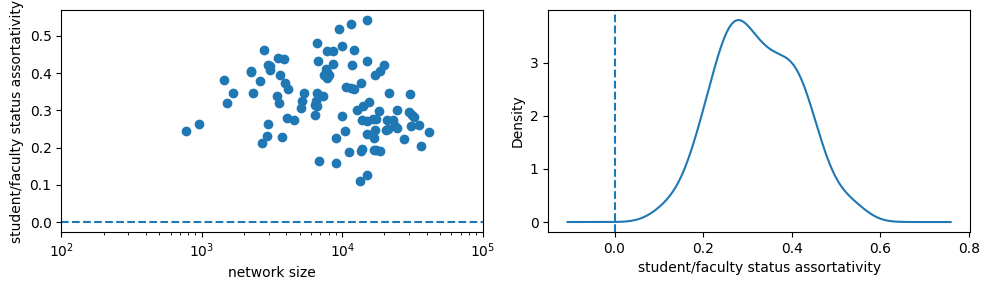

In [49]:
assortativity_scatter_and_distribution_plot(student_fac_assortativity, "student/faculty status")

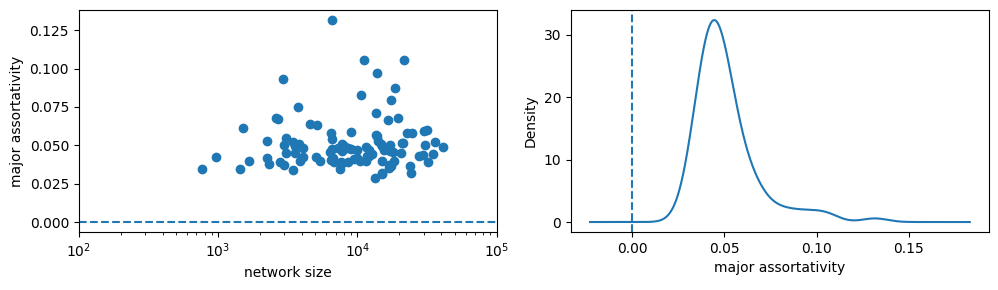

In [50]:
assortativity_scatter_and_distribution_plot(major_assortativity, "major")

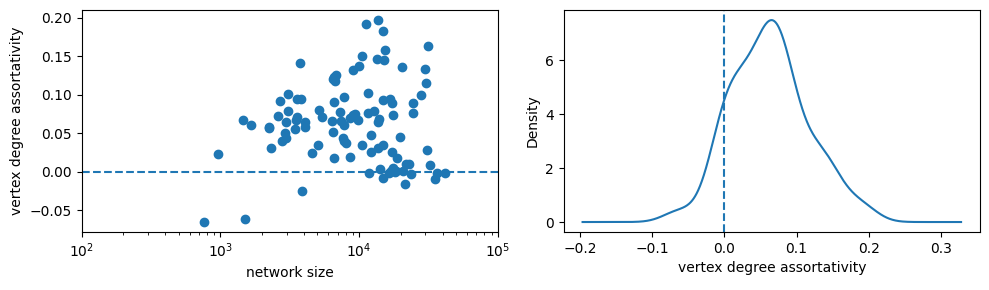

In [51]:
assortativity_scatter_and_distribution_plot(vertex_degree_assortativity, "vertex degree")

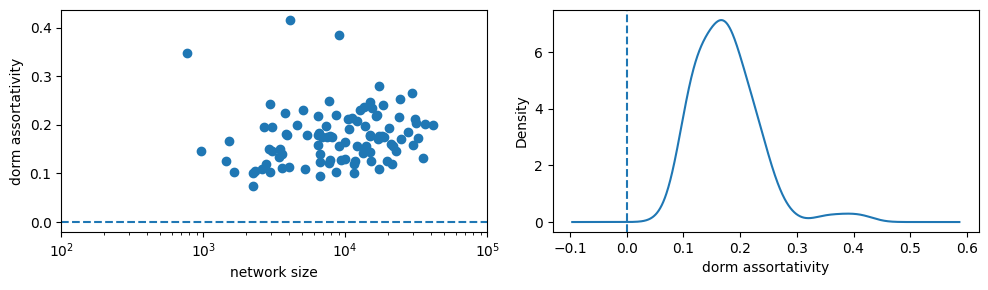

In [52]:
assortativity_scatter_and_distribution_plot(dorm_assortativity, "dorm")

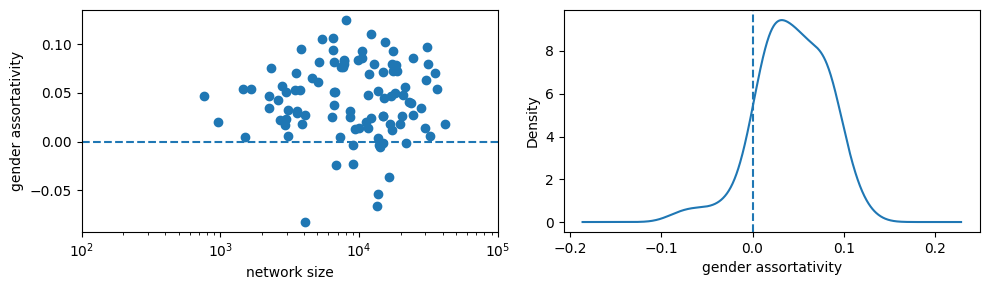

In [48]:
assortativity_scatter_and_distribution_plot(gender_assortativity, "gender")

In [9]:
# Question 4/ (b)

from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
from math import log

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
            graph : Networkx graph
        """
        self.graph = graph
        self.N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
            v : int
                node id

        Return
        ------
            neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors ( v )
        return list ( neighbors_list )

    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError ( " Fit must be implemented " )



class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ).__init__( graph )

    def fit (self) :
        nodes = set(self.graph.nodes())
        commonNeighborsList = []
        for u in nodes :
            for v in nodes - {u} :
                intersectionSize = len( set(self.neighbors(u)) & set(self.neighbors(v)) )
                commonNeighborsList.append((u, v, intersectionSize))
        return commonNeighborsList



class Jaccard ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( Jaccard , self ).__init__( graph )

    def fit (self) :
        nodes = set(self.graph.nodes())
        JaccardList = []
        for u in nodes :
            for v in nodes - {u} :
                unionSize = len( set(self.neighbors(u)) | set(self.neighbors(v)) )
                if unionSize == 0 :
                    JaccardList.append((u, v, 0))
                else :
                    intersectionSize = len( set(self.neighbors(u)) & set(self.neighbors(v)) )
                    JaccardMeasure = intersectionSize / unionSize
                    JaccardList.append((u, v, JaccardMeasure))
        return JaccardList



class AdamicAdar ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( AdamicAdar , self ).__init__( graph )

    def fit (self) :
        nodes = set(self.graph.nodes())
        AdamicAdarList = []
        for u in nodes :
            for v in nodes - {u} :
                commonNeighborsSet = set(self.neighbors(u)) & set(self.neighbors(v))
                if len(commonNeighborsSet) == 0 :
                    AdamicAdarList.append((u, v, 0))
                else :
                    AdamicAdarMeasure = sum ( 1 / log(len(self.neighbors(n))) for n in commonNeighborsSet if len(self.neighbors(n)) > 1 )
                    AdamicAdarList.append((u, v, AdamicAdarMeasure))
        return AdamicAdarList 

In [10]:
# Question 4/ (c)

import random

def removeEdges (graph, fEdgeToRemove) :

    """
        calculer les k-scores d'un algorithme de prédiction de liens

        paramètres
        ----------
        graph : un graphe networkx

        fEdgeToRemove : réel
                        la fraction de noeuds à supprimer

        Retourne
        --------
        un tuple : (le graphe après suppression des liens, ensemble des liens du graphe avant suppression)
    """
    
    # 2)
    # Nombre de noeuds à éliminer du graphe 
    NEdgesRemove = int(graph.number_of_edges()*fEdgeToRemove)
    # Séléction aléatoire des liens à éliminer
    Eremoved = random.sample( list(graph.edges()), NEdgesRemove )

    # 3)
    # Sauvegarder l'ensemble des liens du graphe avant suppression
    edges = set(graph.edges())
    # Le graphe après suppression des liens
    graph.remove_edges_from(Eremoved)
    return (graph, edges)


def graphMetricInstancation (graph, metric) :

    """
        Instancier un graphe selon la métrique de prédiction de liens choisie

        paramètres
        ----------
        graph : un graphe networkx

        metric : chaîne
                 la métrique de prédiction de liens à évaluer
                 peut être l'une de ces 3 valeurs : "CommonNeighbors", "Jaccard" ou "AdamicAdar"

        Retourne
        --------
        le graphe instancié selon la classe choisie
    """

    # Instanciation d'ne classe de prédiction de liens
    if metric == "CommonNeighbors" :
        graphLinkPrediction = CommonNeighbors(graph)
    elif metric == "Jaccard" :
        graphLinkPrediction = Jaccard(graph)
    elif metric == "AdamicAdar" :
        graphLinkPrediction = AdamicAdar(graph)
    return graphLinkPrediction

def kScoresCalculation (graphLinkPrediction, edges, k) :
    
    """
        calculer les k-scores d'un algorithme de prédiction de liens

        paramètres
        ----------
        graphLinkPrediction : un graphe instancié à la classe de prédiction de liens

        edges : ensemble de liens du graphe original

        k : entier
            les k liens ayant les valeurs de métrique les plus élevées

        Retourne
        --------
        un tuple de 3 réels : (top@k, precision@k, recall@k)
    """

    # Calcul de la métrique de prédiction des liens
    Epredict = graphLinkPrediction.fit()


    # 4)
    # Trier "Epredict" par ordre décroissant de la valeur de la métrique
    Epredict.sort(key=lambda a: a[2], reverse=True)

    # 5)
    EpredictTop_k = [ (Epredict[i][0], Epredict[i][1]) for i in range(k) ] 

    TP = edges & set(EpredictTop_k)
    FP = set(EpredictTop_k) - TP
    FN = edges - TP

    top_k = 100 * len(TP) / k
    precision_k = len(TP) / (len(TP) + len(FP))
    recall_k = len(TP) / (len(TP) + len(FN))

    return (top_k, precision_k, recall_k)

In [16]:
import matplotlib.pylab as plt

def LinkPredictionEvaluation (graph, metric, fEdgeToRemove) :

    graphLinkPrediction = graphMetricInstancation (graph, metric)
    Evaluation_list = []
    k_list = []
    for k in range (50, 401, 50) :
        k_list.append(k)
        Evaluation_list.append(kScoresCalculation (graphLinkPrediction, edges, k))

    # Courbes scores-k en fonction de k
    plt.subplots(1, 3, figsize=(12,3))
    plt.suptitle("évaluation de la métrique " + metric)
    
    # precision@k
    plt.subplot(1, 3, 1)
    plt.plot(k_list, [elt[1] for elt in Evaluation_list])
    plt.xlabel("k")
    plt.ylabel("precision@k")

    # recall@k
    plt.subplot(1, 3, 2)
    plt.plot(k_list, [elt[2] for elt in Evaluation_list])
    plt.xlabel("k")
    plt.ylabel("recall@k")
    
    # top@k
    plt.subplot(1, 3, 3)
    plt.plot(k_list, [elt[0] for elt in Evaluation_list])
    plt.xlabel("k")
    plt.ylabel("top@k (pourcentage)")

    plt.tight_layout()
    
    plt.show()

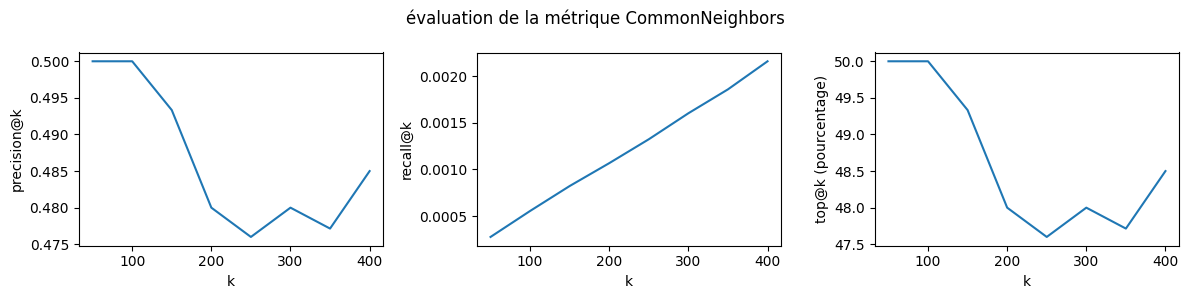

In [4]:
# Question 4/ (d)

graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Oberlin44.gml")

LinkPredictionEvaluation (graph, "CommonNeighbors", 0.15)

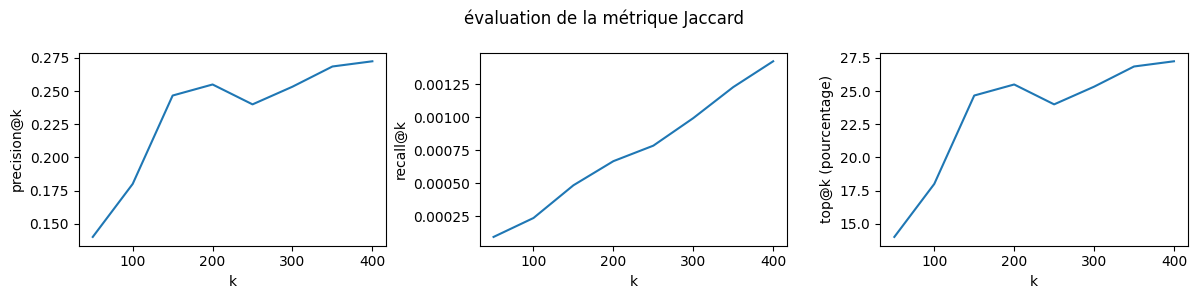

In [5]:
LinkPredictionEvaluation (graph, "Jaccard", 0.15)

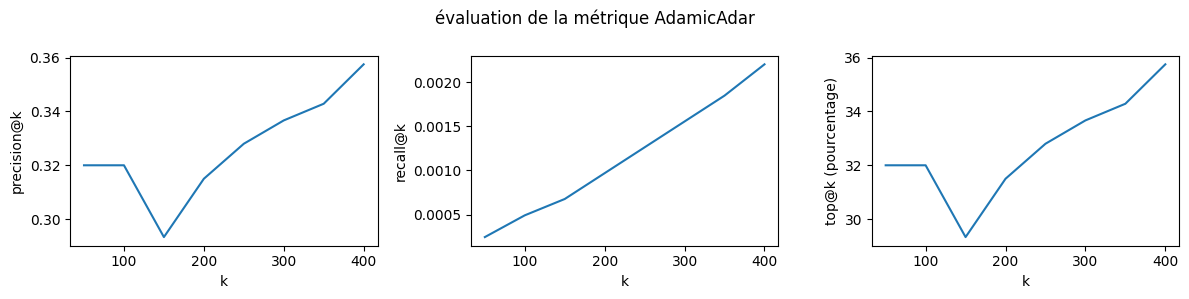

In [6]:
LinkPredictionEvaluation (graph, "AdamicAdar", 0.15)

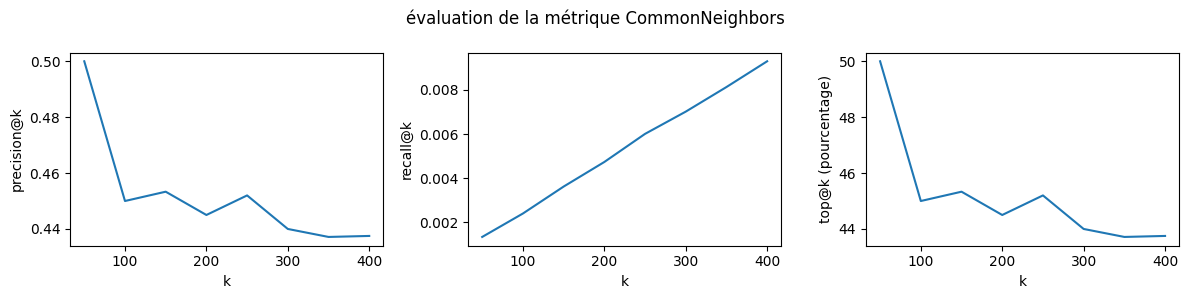

In [7]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Reed98.gml")
LinkPredictionEvaluation (graph, "CommonNeighbors", 0.15)

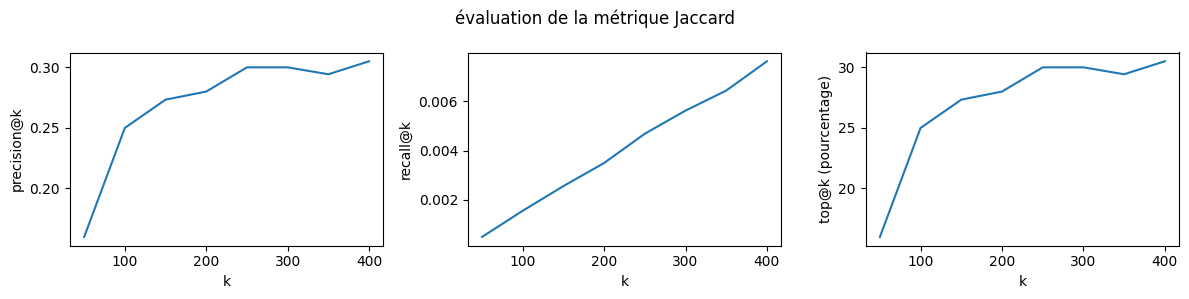

In [8]:
LinkPredictionEvaluation (graph, "Jaccard", 0.15)

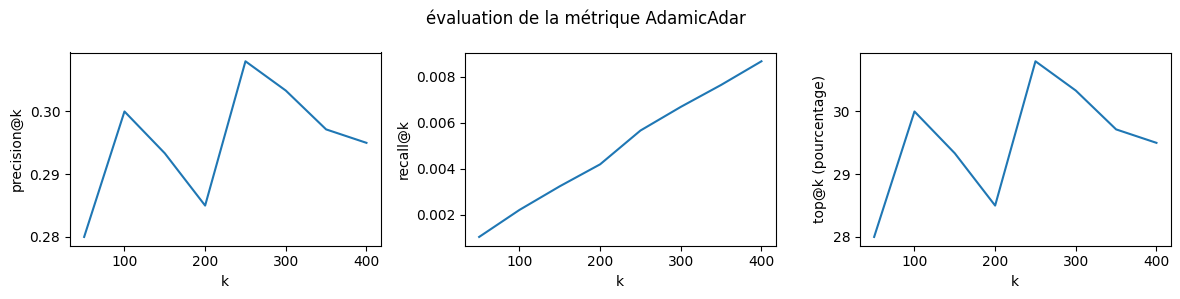

In [9]:
LinkPredictionEvaluation (graph, "AdamicAdar", 0.15)

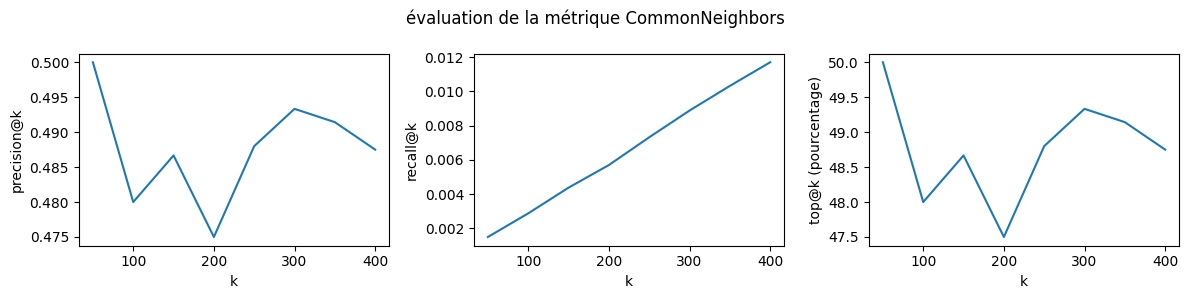

In [12]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")
LinkPredictionEvaluation (graph, "CommonNeighbors", 0.15)

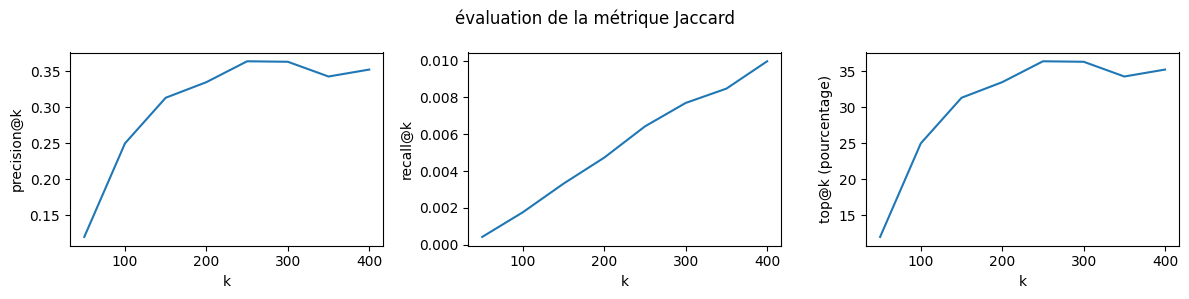

In [13]:
LinkPredictionEvaluation (graph, "Jaccard", 0.15)

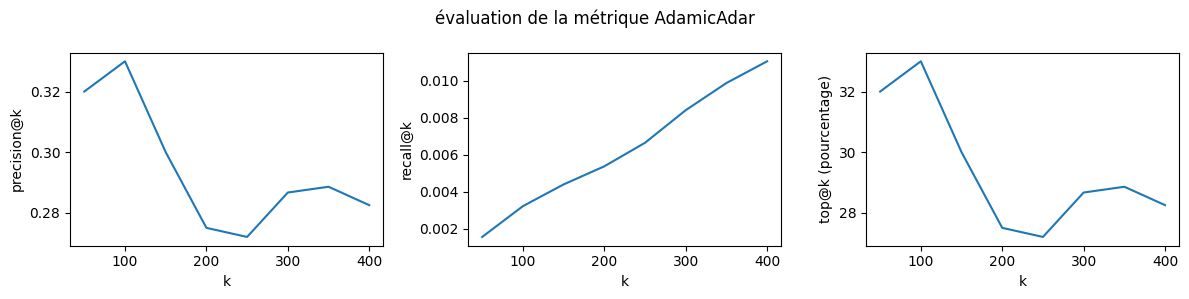

In [15]:
LinkPredictionEvaluation (graph, "AdamicAdar", 0.15)

In [24]:
# Question 5/ (b)

import networkx as nx
from collections import Counter

def LP_Zhu (graph, y, max_iter=100) :
    y_predicted = y.copy ()
    for i in range (max_iter) :
        convergence = True
        for node in graph.nodes() :
            node = str(node)
            if y_predicted.get(node) is None :
                neighbor_labels = [y_predicted.get(str(n)) for n in graph.neighbors(node) if y_predicted.get(str(n)) is not None]
                if neighbor_labels :
                    best_label = Counter(neighbor_labels).most_common(1)[0][0]
                    y_predicted[node] = best_label
                    convergence = False
        if convergence == True :
            break
    return y_predicted

In [25]:
# Question 5/ (c)

import random
from sklearn.metrics import accuracy_score, mean_absolute_error

def removeLabels(graph, attribute, fLabelToRemove):
    labels = {str(node): data.get(attribute, None) for node, data in graph.nodes(data=True)}
    # Supprimer les noeuds qui n'avaient pas de valeur pour l'attribut dés le départ (missing labels)
    labels = {k: v for k, v in labels.items() if v is not None}

    nodes = list(labels.keys())
    random.shuffle(nodes)
    # le nombre de labels à supprimer
    NLabelsToRemove = int(fLabelToRemove * len(nodes))
    unlabeled_nodes = nodes[:NLabelsToRemove]
    labeled_nodes = nodes[NLabelsToRemove:]

    y = {}
    for node in labeled_nodes:
        y[node] = labels[node]
    for node in unlabeled_nodes:
        y[node] = None

    return y, labels

def calculateScores (y_true, y_predicted) :
    y_true_list = []
    y_predicted_list = []
    for node in y_true :
        if y_true[node] is not None and y_predicted.get(node) is not None :
            y_true_list.append(y_true[node])
            y_predicted_list.append(y_predicted[node])

    accuracy = accuracy_score(y_true_list, y_predicted_list)
    mae = mean_absolute_error(y_true_list, y_predicted_list)
    return accuracy, mae

def LabelPropagationEvaluation (graph) :
    
    for fLabelToRemove in [0.1, 0.2, 0.3, 0.4] :
        print("Résultats en enlèvant des liens avec une fraction qui vaut ", fLabelToRemove, " :")
        for label in ["dorm", "major_index", "gender"] :
            y, y_true = removeLabels(graph, label, fLabelToRemove)
            y_predicted = LP_Zhu(graph, y)
            print ("    Résultats pour le label ", label, " :")
            accuracy, mae = calculateScores (y_true, y_predicted)
            print("        accuracy = ", accuracy)
            print("        mean average error = ", mae)
        print ("\n")
            

In [26]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Duke14.gml")

LabelPropagationEvaluation(graph)

Résultats en enlèvant des liens avec une fraction qui vaut  0.1  :
    Résultats pour le label  dorm  :
        accuracy =  0.946033350176857
        mean average error =  6.909044972208186
    Résultats pour le label  major_index  :
        accuracy =  0.9245073269327944
        mean average error =  3.9316826680141483
    Résultats pour le label  gender  :
        accuracy =  0.9599797877716019
        mean average error =  0.04446690247599798


Résultats en enlèvant des liens avec une fraction qui vaut  0.2  :
    Résultats pour le label  dorm  :
        accuracy =  0.8958059626073774
        mean average error =  13.449924204143507
    Résultats pour le label  major_index  :
        accuracy =  0.8472966144517433
        mean average error =  8.094593228903486
    Résultats pour le label  gender  :
        accuracy =  0.9243052046488125
        mean average error =  0.08448711470439615


Résultats en enlèvant des liens avec une fraction qui vaut  0.3  :
    Résultats pour le label 

In [8]:
# Question 6/ (b)

import community.community_louvain as community_louvain
from sklearn.metrics import normalized_mutual_info_score
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pylab as plt

def graphPreparation(graph, label) :
    graph = nx.convert_node_labels_to_integers(graph)
    labels = nx.get_node_attributes(graph, label)
    labels = {k:v for k, v in labels.items() if v is not None}
    return graph, labels

def NMI_Louvain (graph, graph_labels) :
    partition = community_louvain.best_partition(graph)
    nodes = list( set(partition.keys()) & (graph_labels.keys()) )
    predicted = [partition[n] for n in nodes]
    truth = [graph_labels[n] for n in nodes]
    NMI = normalized_mutual_info_score(predicted, truth)
    return NMI

def Evaluation (graph) :
    for attribute in ["dorm", "student_fac", "major_index", "gender"] :
        graph, labels = graphPreparation(graph, attribute)
        NMI = NMI_Louvain(graph, labels)
        print("Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut '",attribute,"' est NMI = ", NMI)

In [19]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")
Evaluation(graph)

Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' dorm ' est NMI =  0.5483976421949793
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' student_fac ' est NMI =  0.04128477815440931
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' major_index ' est NMI =  0.0790061448245972
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' gender ' est NMI =  0.017032169907807284


In [21]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")
Evaluation(graph)

Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' dorm ' est NMI =  0.25153995294117126
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' student_fac ' est NMI =  0.07698253828511407
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' major_index ' est NMI =  0.04528552770606842
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' gender ' est NMI =  0.014315794777043766


In [22]:
graph = nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")
Evaluation(graph)

Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' dorm ' est NMI =  0.2103333596081063
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' student_fac ' est NMI =  0.10153904141738158
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' major_index ' est NMI =  0.10780899373426893
Le NMI calculé pour l'algorithme de Louvain en se basant sur l'attribut ' gender ' est NMI =  0.01363559347258115
